In [28]:
import zarr
from dawsonia.io import *

In [29]:
%cd /local_disk/data/ai-for-obs/raw_zarr/

/local_disk/data/ai-for-obs/raw_zarr


In [30]:
z = zarr.open(zarr_file := "./ÖLAND/DAGBOOK_Öland_Station_Jan-Dec_1938-1.zarr.zip", "r")
# z = zarr.open(zarr_file := "./BJURÖKLUBB/DAGBOK_Bjuröklubb_Station_Jan-Dec_1928.zarr.zip", "r")

dict(z.attrs)

{'api': 'dawsonia.io.read_book',
 'byteimage_exts': ['jpg'],
 'first_page': 1,
 'last_page': 184,
 'station_name': 'öland',
 'year': '1938-1'}

In [31]:
get_station_name(z)

'öland'

In [32]:
get_year(z)

'1938-1'

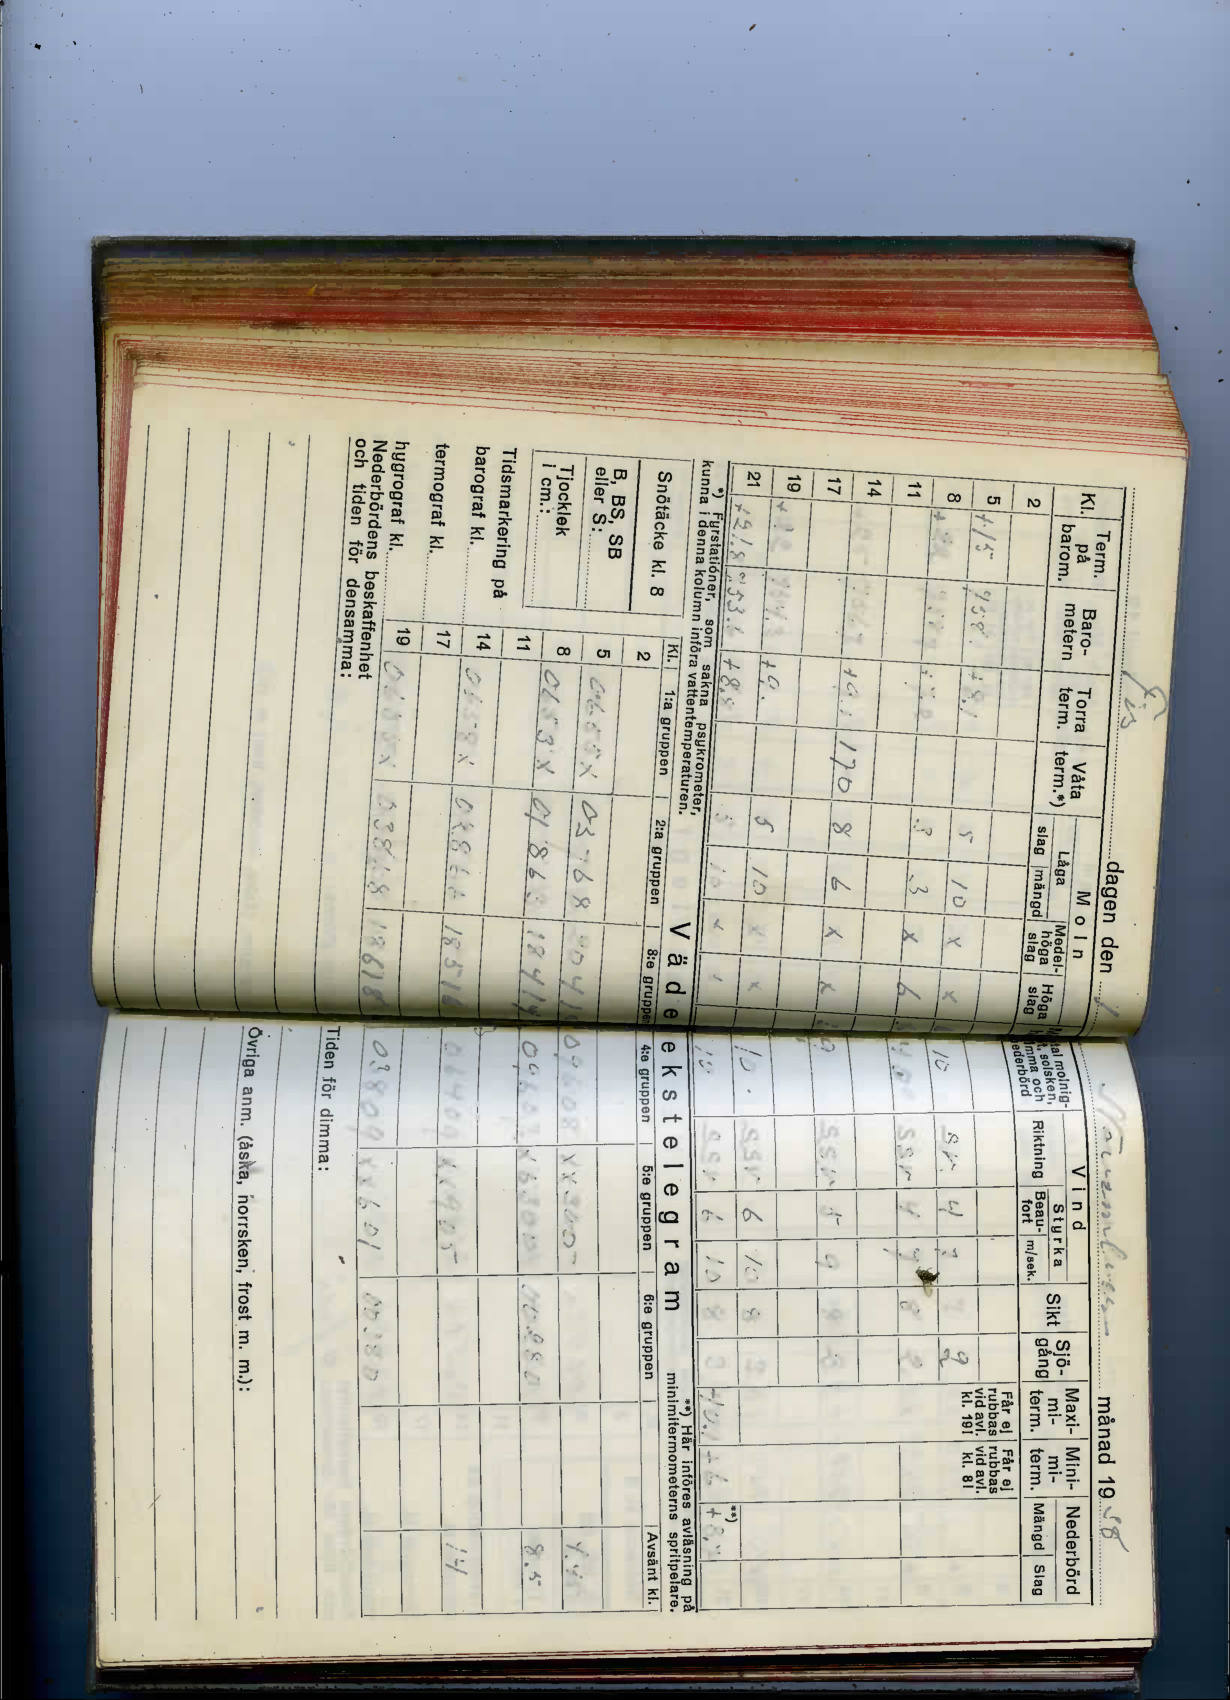

In [33]:
from PIL import Image
import io
byteimage = z["page_124/byteimage"][0]
# Create a BytesIO object to wrap the image bytes
image_data = io.BytesIO(byteimage)

# Initialize a Pillow Image object using the BytesIO object
image = Image.open(image_data)
image

In [34]:
image.size

(1230, 1700)

In [35]:
pdf_file = "../raw/" + zarr_file.replace(".zarr.zip", ".pdf")
first, last, book = read_book(
    pdf_file,
    table_fmt_dir="/local_disk/dev/ai-for-obs.ashwin/dawsonia/table_formats/"
)
a1 = book.read_page(124)

WARNING  2023-10-04 13:52:46,838 - dawsonia.io._pdf - WARNING -                                                    
         path_pdf=PosixPath('../raw/ÖLAND/DAGBOOK_Öland_Station_Jan-Dec_1938-1.pdf') contains only a part of the   
         year.

INFO     2023-10-04 13:52:46,844 - dawsonia.io._pdf - INFO - table_format = TableFormat(name_idx='tid',            
         columns=[['term_på_baro', 'barom', 'torra_term', 'våta_term', 'moln_slag_lägre', 'moln_mängd_lägre',      
         'moln_slag_medel', 'moln_slag_högre', 'moln_höjd'], ['moln_het_sol_dimma_nederbörd_total',                
         'vind_riktning', 'vind_beaufort', 'vind_m_sek', 'sikt', 'sjögang', 'maximi_term', 'minimi_term',          
         'nederbörd_mängd', 'nederbörd_slag']], rows=(datetime.time(2, 0), datetime.time(5, 0), datetime.time(8,   
         0), datetime.time(11, 0), datetime.time(14, 0), datetime.time(17, 0), datetime.time(19, 0),               
         datetime.time(21, 0)), tables=[[8, 9], [8, 10], [3, 1], [7, 3], [7, 5]],                                  
         preproc=PreprocConfig(table_modif=True, corr_rotate=True, row_idx_unit=<TimeUnits.HOURS: 1>,              
         idx_tables_size_verify=[0, 1]), transforms=TransformsConfig(rotate=90), version='2', station='öland')

INFO     2023-10-04 13:52:46,898 - dawsonia.io._pdf - INFO - pdf_info = {'Creator': 'pdftk-java 3.3.3', 'Producer':
         'itext-paulo-155 (itextpdf.sf.net - lowagie.com)', 'CreationDate': 'Wed Jul 19 21:40:54 2023 UTC',        
         'ModDate': 'Wed Jul 19 21:40:54 2023 UTC', 'Tagged': 'no', 'UserProperties': 'no', 'Suspects': 'no',      
         'Form': 'none', 'JavaScript': 'no', 'Pages': 184, 'Encrypted': 'no', 'Page size': '589 x 820 pts', 'Page  
         rot': '0', 'File size': '31988130 bytes', 'Optimized': 'no', 'PDF version': '1.4'}

INFO     2023-10-04 13:52:46,909 - dawsonia.io._pdf - INFO - Setting first_page = 1

INFO     2023-10-04 13:52:46,914 - dawsonia.io._pdf - INFO - Setting last_page_number = max_pages

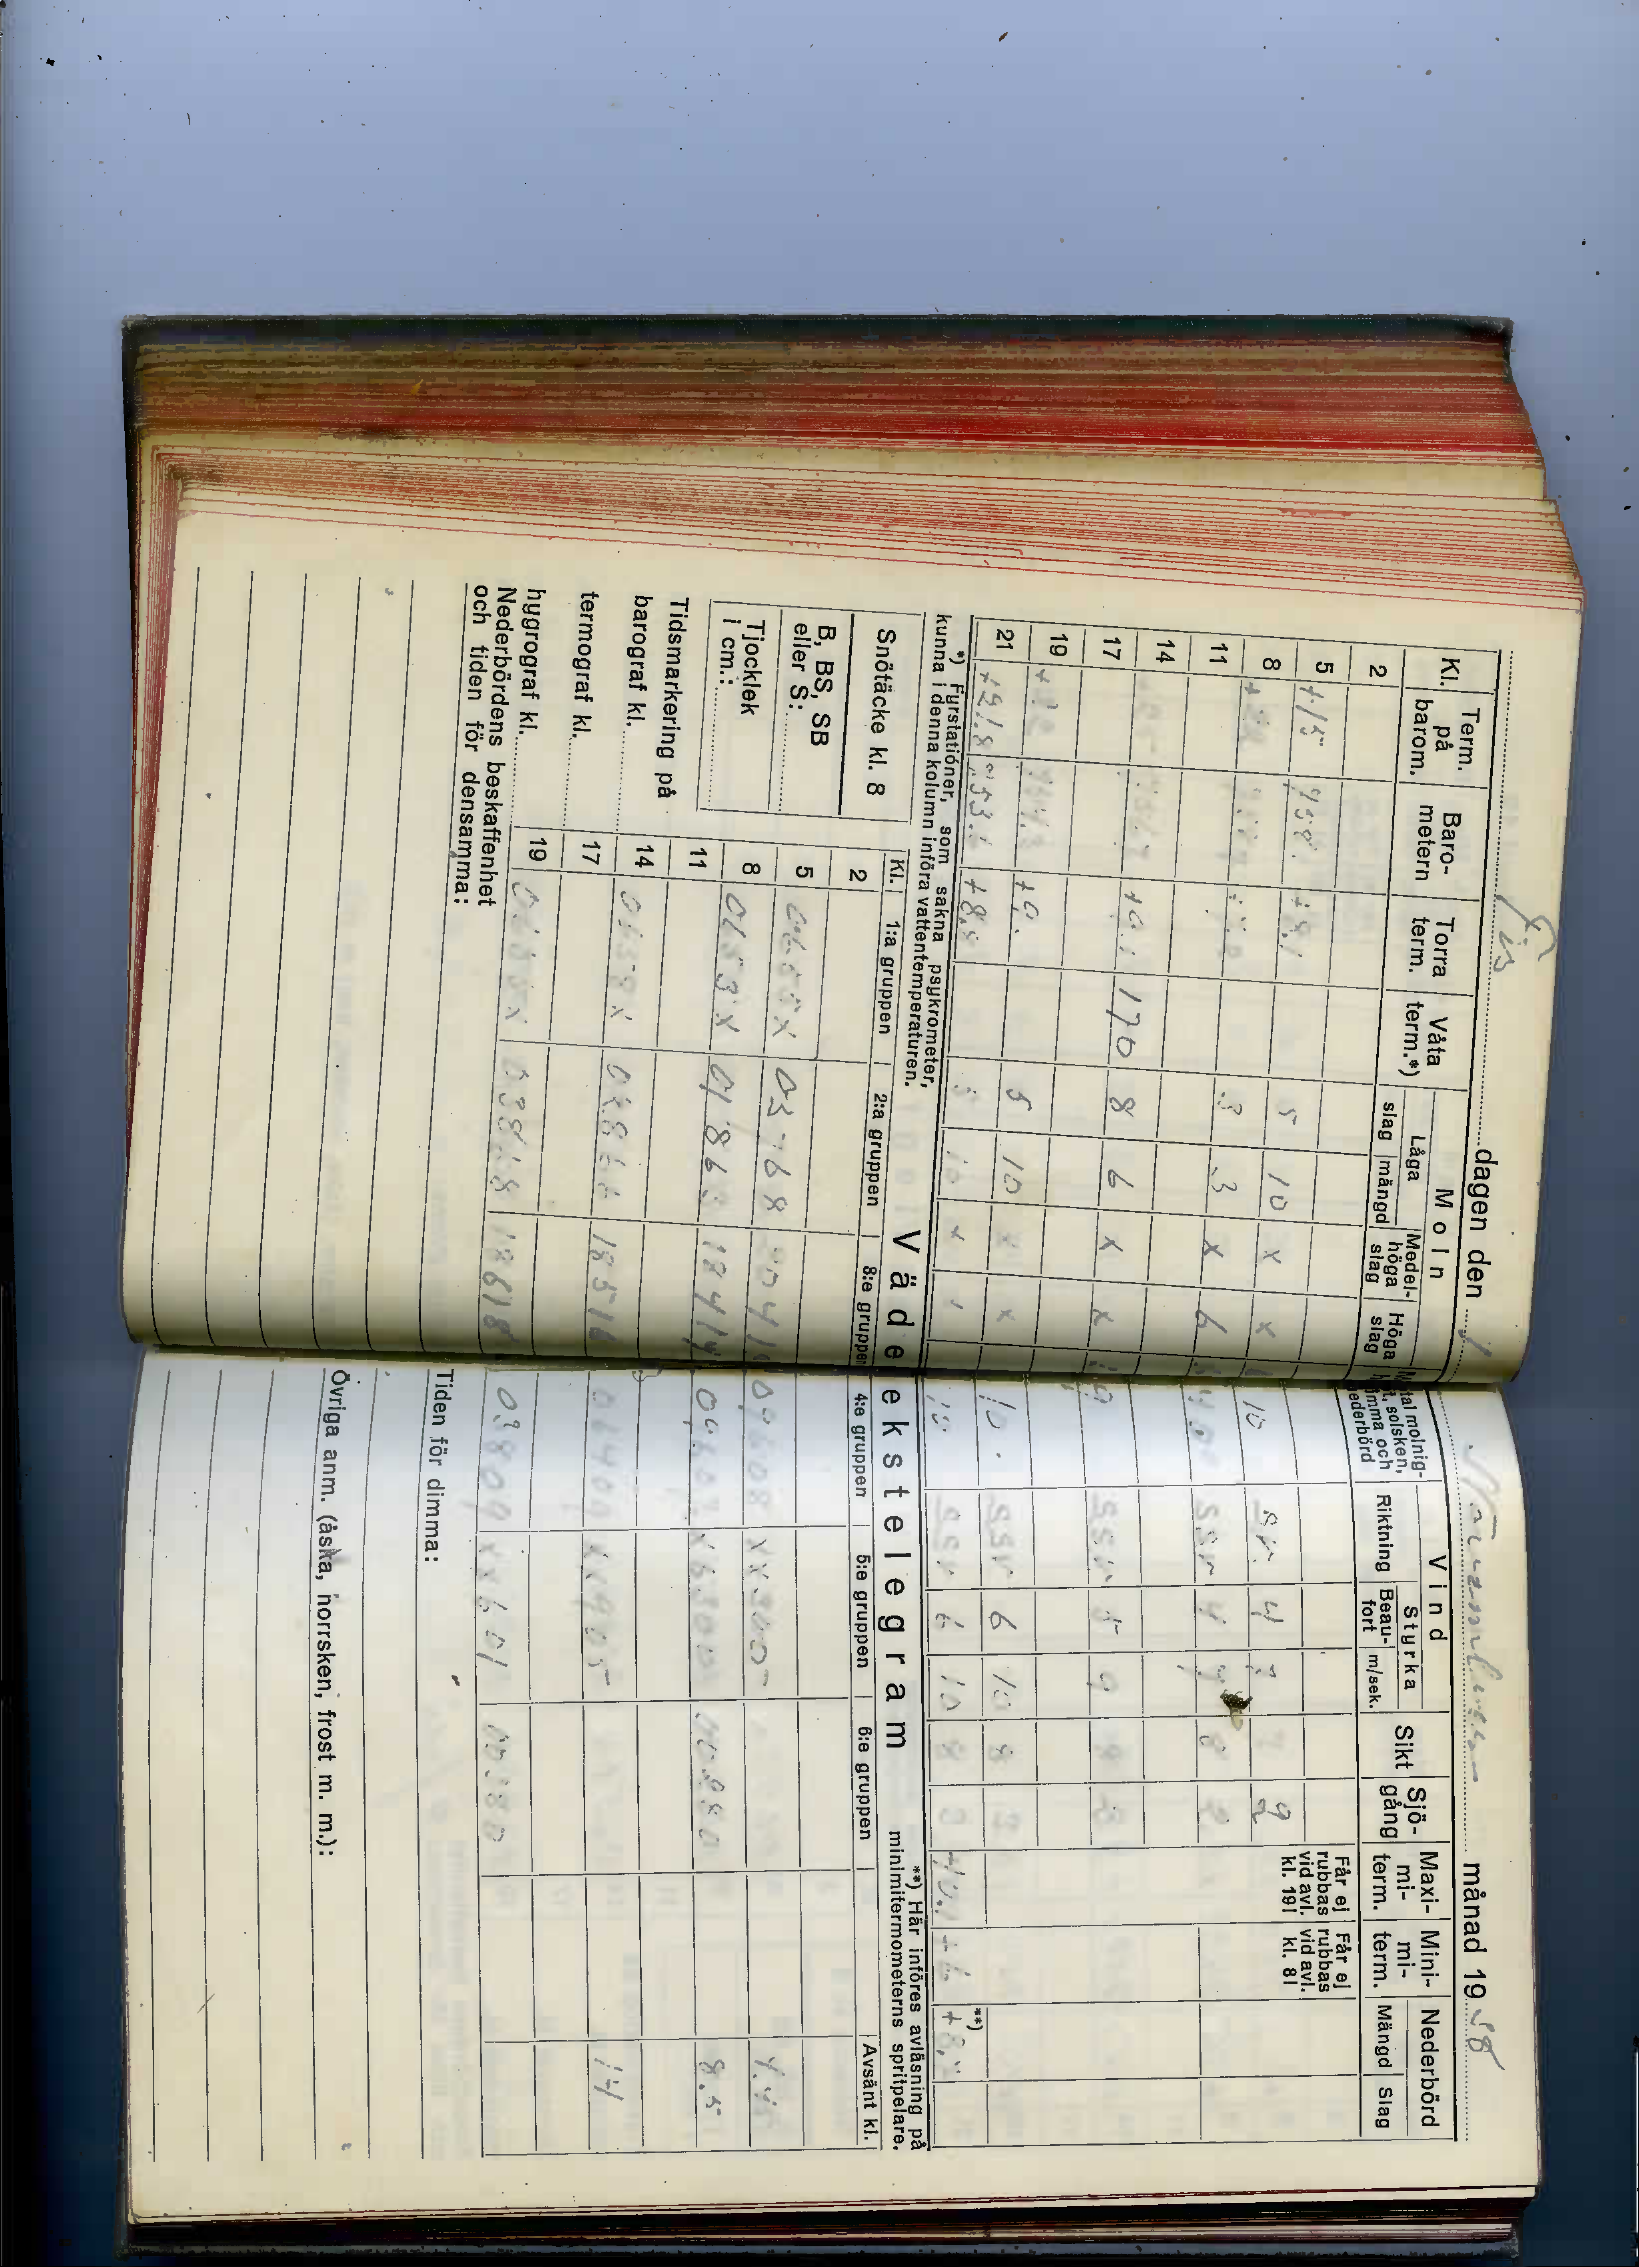

In [36]:
import numpy as np
from PIL.Image import fromarray

image_pdf = fromarray(a1.astype(np.uint8))
image_pdf

In [37]:
image_pdf.size

(1639, 2267)

In [38]:
import numpy as np
np.array(image.size) / np.array(image_pdf.size)

array([0.7504576 , 0.74988972])

In [39]:
np.array(image.size) * 1 / 2


array([615., 850.])

In [40]:
first, last, book = read_book(
    zarr_file,
    table_fmt_dir="/local_disk/dev/ai-for-obs.ashwin/dawsonia/table_formats/"
)

INFO     2023-10-04 13:52:48,626 - dawsonia.io._zarr - INFO - table_format = TableFormat(name_idx='tid',           
         columns=[['term_på_baro', 'barom', 'torra_term', 'våta_term', 'moln_slag_lägre', 'moln_mängd_lägre',      
         'moln_slag_medel', 'moln_slag_högre', 'moln_höjd'], ['moln_het_sol_dimma_nederbörd_total',                
         'vind_riktning', 'vind_beaufort', 'vind_m_sek', 'sikt', 'sjögang', 'maximi_term', 'minimi_term',          
         'nederbörd_mängd', 'nederbörd_slag']], rows=(datetime.time(2, 0), datetime.time(5, 0), datetime.time(8,   
         0), datetime.time(11, 0), datetime.time(14, 0), datetime.time(17, 0), datetime.time(19, 0),               
         datetime.time(21, 0)), tables=[[8, 9], [8, 10], [3, 1], [7, 3], [7, 5]],                                  
         preproc=PreprocConfig(table_modif=True, corr_rotate=True, row_idx_unit=<TimeUnits.HOURS: 1>,              
         idx_tables_size_verify=[0, 1]), transforms=TransformsConfig(rotate=90), version='2', station='öland')

INFO     2023-10-04 13:52:48,644 - dawsonia.io._zarr - INFO - Setting first_page = 1

INFO     2023-10-04 13:52:48,648 - dawsonia.io._zarr - INFO - Setting last_page_number = max_pages

In [41]:
last

184

In [42]:
a2 = book.read_page(last//3)

INFO     2023-10-04 13:52:48,674 - dawsonia.io._zarr - INFO - Setting first_page = 61

In [43]:
last //3

61

INFO     2023-10-04 13:52:48,780 - dawsonia.io._zarr - INFO - Setting first_page = 61

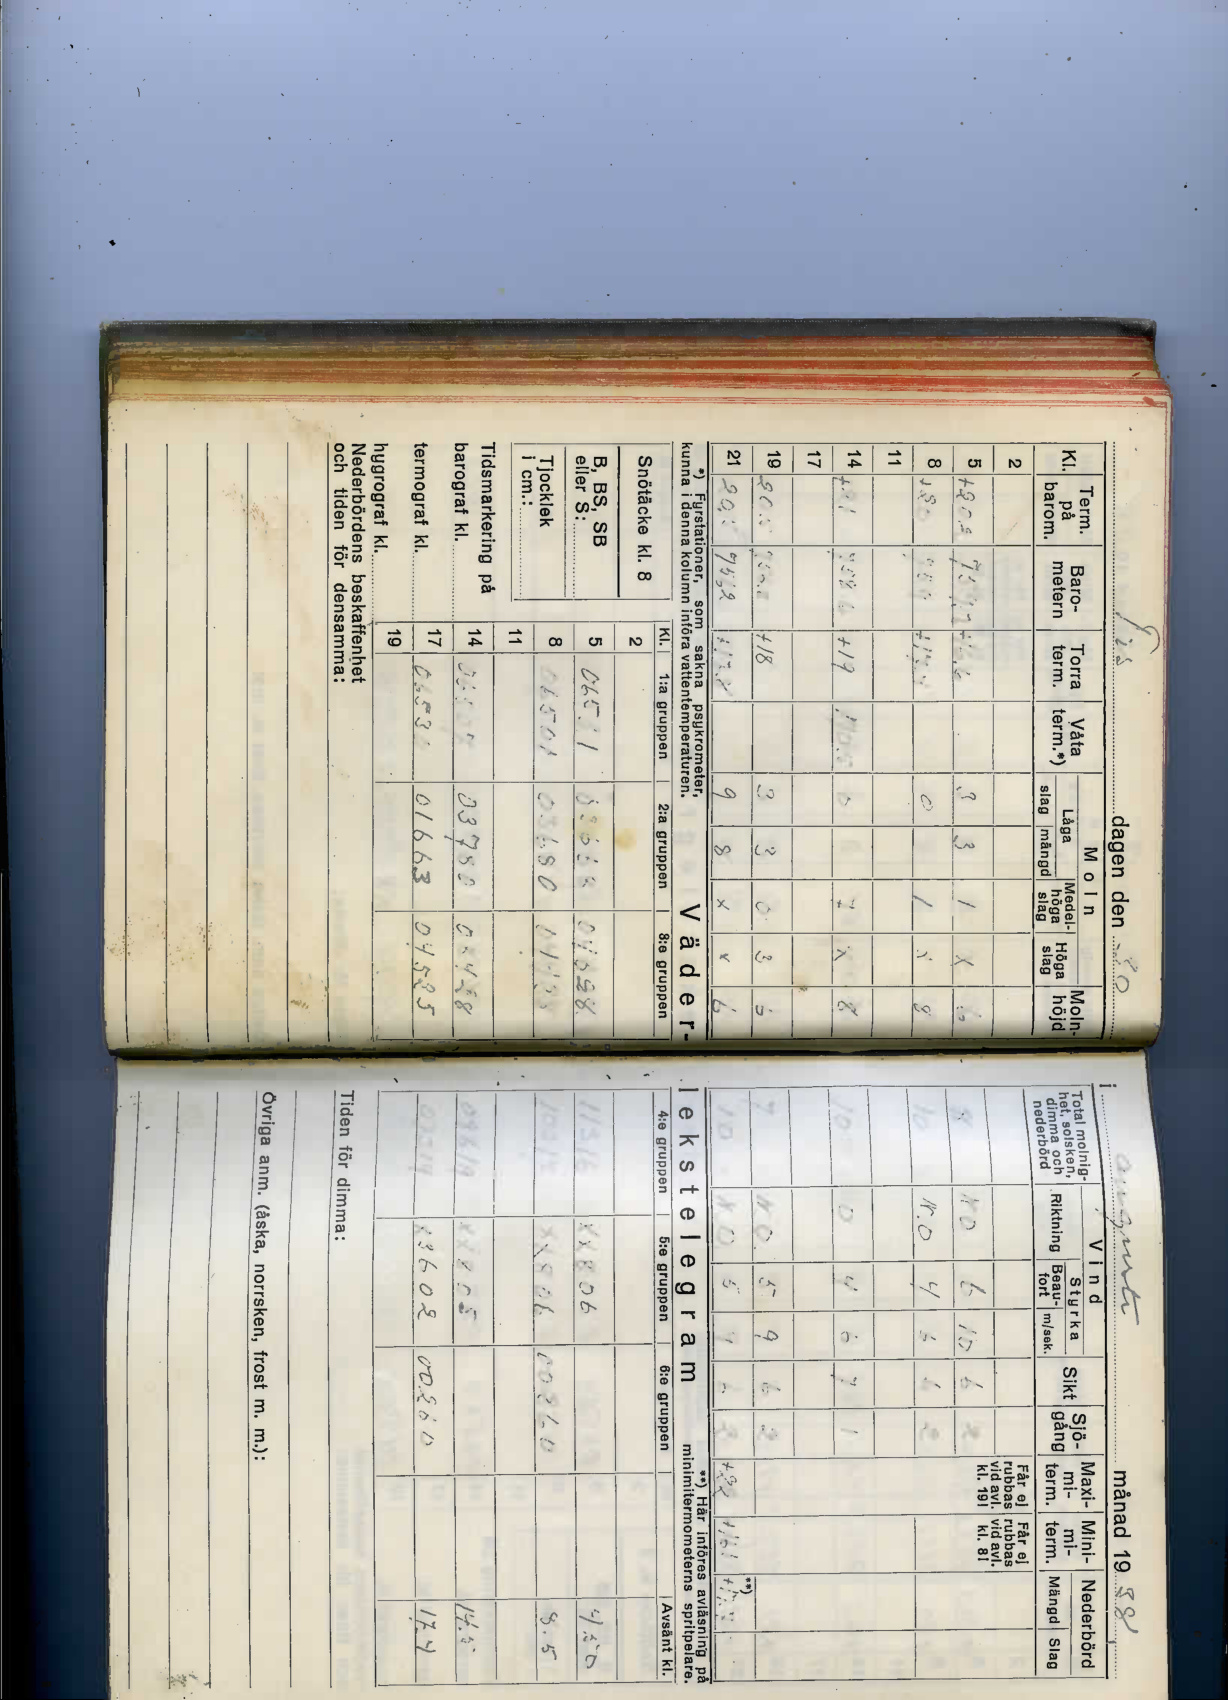

In [44]:
book.read_image(last//3)